# <code style="color:Crimson">2.Data Cleaning and 3.Feature Engineering</code>

#### Let's import libraries needed for data cleaning and feature engineering.

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# (Optional) Avoid FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Next, read in the dataset.
* The file name is <code style="color:crimson">'employee_data.csv'</code> 

In [61]:
df = pd.read_csv('employee_data.csv')

In [62]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


## <span style="color:RoyalBlue">Drop Unwanted Observations</span>

#### A. First, <span style="color:royalblue">drop duplicates</span> from the dataset.

In [63]:
df.shape

(14249, 10)

In [64]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [65]:
df.shape

(14221, 10)

Next, let's drop any irrelevant observations. In EDA, we saw that we have temp workers (in the 'department' feature). However, based on our project scope, we don't want to model temp workers.


#### B. Display all of the unique classes of the <code style="color:steelblue">'department'</code> feature.

In [66]:
# Unique classes of 'department'
print( df.department.unique() )

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'temp'
 'procurement' 'finance' nan 'management' 'information_technology' 'admin']


We can see that 'temp' shouldn't belong in this dataset because based on the project scope, we're only trying to build a model for permanent, full time employees. Therefore, we can remove observations that belong to the 'temp' department. 

#### C. Drop all observations that belong to the 'temp' department.

In [67]:
# Drop temporary workers
df = df[df.department != 'temp']

## <span style="color:RoyalBlue">Fix Structural Errors</span>

First, let's handle any features that should be **indicator variables**. These are variables that **should** be either <code style="color:crimson">0</code> or <code style="color:crimson">1</code>. 

For example, the <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> features. They only have values of <code style="color:crimson">1</code> and <code style="color:crimson">NaN</code>.



#### A. Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code>.

In [68]:
# Print unique values of 'filed_complaint'
print( df.filed_complaint.unique() )

# Print unique values of 'recently_promoted'
print( df.recently_promoted.unique() )

[nan  1.]
[nan  1.]


Even though the <code style="color:crimson">NaN</code> values are "missing," they actually indicate employees who have not filed complaints or those who have not been recently promoted. Therefore, we can fill them in with the value <code style="color:crimson">0</code>

#### B. Fill missing <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> values with <code style="color:crimson">0</code>.

In [69]:
df.filed_complaint.fillna(0,inplace=True)

In [70]:
df.recently_promoted.fillna(0,inplace=True)

Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> again to verify our results.

In [74]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


Next, let's check for **typos**, **inconsistent capitalization**, or **mislabeled classes**. For example, in <code style="color:steelblue">'department'</code> and found out that <code style="color:crimson">'IT'</code> and <code style="color:crimson">'information_technology'</code> are labeled as separate classes when they really refer to the same department.

#### C. Replace any instances of <code style="color:crimson">'information_technology'</code> with <code style="color:crimson">'IT'</code> instead.

In [75]:
df.department.replace('information_technology', 'IT', inplace=True)

Plot the **bar chart** for <code style="color:steelblue">'department'</code> to see its new distribution.

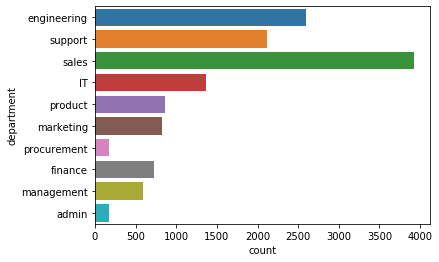

In [76]:
sns.countplot(y='department', data=df)

Finally, let's check if we need to remove any **unwanted outliers**. 

In this case, a simple eye-test is enough to tell us that it there aren't any outliers.

## <span style="color:RoyalBlue">Handle Missing Data</span>

The 2 most commonly recommended ways of dealing with missing data (dropping observations or imputing them) are bad practices.

Instead, labeling missing values so the algorithm knows they were originally missing is a good way of handling missing values.


#### A. Display the <span style="color:royalblue">number of missing values</span> for each feature (both categorical and numeric).

In [77]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

It looks like we have 1 categorical feature with missing data (<code style="color:steelblue">'department'</code>) and one numeric feature (<code style="color:steelblue">'last_evaluation'</code>).  Remember, for categorical features, the strategy for dealing with them is **labeling them as missing**.

#### B.) Label missing values in <code style="color:steelblue">'department'</code> as <code style="color:crimson">'Missing'</code>.

In [78]:
df['department'].fillna('Missing', inplace=True)

In [79]:
df.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

Next, let's **flag and fill** missing numerical features.

#### C. First, let's flag <code style="color:steelblue">'last_evaluation'</code> with an indicator variable of missingness.
* <code style="color:crimson">0</code> if not missing.
* <code style="color:crimson">1</code> if missing. 

Let's name the new indicator variable <code style="color:steelblue">'last_evaluation_missing'</code>.


In [80]:
#create a flag for missingness. If we don't use .astype(int) we will get true/false values
df['last_evaluation_missing']=df.last_evaluation.isnull().astype(int)

In [81]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0,0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0,0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0,0
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0,0


#### D. Then, fill in the original missing value with <code style="color:crimson">0</code> just so our algorithms can run properly.

In [82]:
df.last_evaluation.fillna(0,inplace=True)

Remember, by using this technique of flagging and filling, we are essentially **allowing the algorithm to estimate the optimal constant for missingness**, instead of just imputing it in with the mean.

Now, our dataset should no longer have missing values.



#### E. Display the number of missing values for each feature (both categorical and numeric) again, just to confirm.

In [83]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

## <span style="color:RoyalBlue">Engineering new features</span>

We won't always have a lot of **domain knowledge** for a given problem. In these situations, we should rely on exploratory analysis to provide us hints.

Revisit the scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code> from the EDA.


#### A. Plot a scatter plot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code>

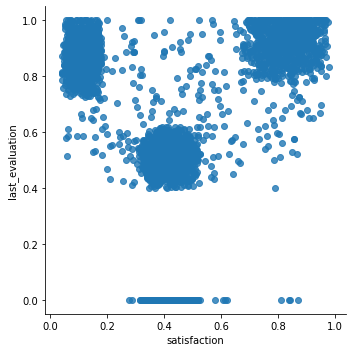

In [84]:
sns.lmplot(x='satisfaction',y='last_evaluation',data=df[df.status == 'Left'],fit_reg=False)

It looks like there are 3 clusters of people who left.
1. First, we have people with high <code style="color:steelblue">'last_evaluation'</code> but low <code style="color:steelblue">'satisfaction'</code>. Maybe these people were overqualified, frustrated, or **unhappy**
2. Next, we have people with low <code style="color:steelblue">'last_evaluation'</code> and medium <code style="color:steelblue">'satisfaction'</code>. These were probably **underperformers**
3. Finally, we have people with high <code style="color:steelblue">'last_evaluation'</code> and high <code style="color:steelblue">'satisfaction'</code>. Perhaps these were **overachievers** who found better offers elsewhere.

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7


#### B. Create  3 indicator features.

* **Important:** For <code style="color:steelblue">'underperformer'</code>, it's important to include <code style="color:steelblue">'last_evaluation_missing' == 0</code> to avoid those originally missing observations that we flagged and filled.

In [85]:
df['underperformer'] = ((df.last_evaluation < 0.6) & (df.last_evaluation_missing == 0)).astype(int)

In [86]:
df['unhappy']= (df.satisfaction < 0.2).astype(int)

In [87]:
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [88]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0,0,1
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,1,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0,0,0,0,0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0,0,0,0,0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0,0,0,0,1
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0,0,0,0,0


## <span style="color:RoyalBlue">One Hot encoding</span>

1. Convert the target variable into an indicator variable.
2. Convert other categorical features into dummy variables.

Scikit-Learn expects the target variable to be **numeric**. And since we only have 2 classes (<code style="color:crimson">'Left'</code> and <code style="color:crimson">'Employed'</code>), we can convert it into an indicator variable.


#### A. Convert <code style="color:steelblue">'status'</code> into an indicator variable.
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>


In [91]:
 # Convert status to an indicator variable
df = df.replace({'status':{'Left':1,'Employed':0}})

Next, let's create dummy variables for the other categorical features.




#### B. Overwrite your dataframe with a version that has <span style="color:royalblue">dummy variables</span> for the categorical features.
* Then, display the first 10 rows to confirm all of the changes we've made so far in this module.

In [93]:
# Create new dataframe with dummy variables
df = pd.get_dummies(df, columns=['department', 'salary'])

In [94]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0


## <span style="color:RoyalBlue">Save the Cleaned Data</span>

In [129]:
df.to_csv('analytical_base_table.csv', index=None)